In [1]:
import nest
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import time
        
import nest.voltage_trace
import nest.raster_plot
    
nest.set_verbosity("M_WARNING")


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Oct 15 2023 15:12:16

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



Network Architecture

In [2]:
def CorticalThalamicNetwork():
    nest.ResetKernel()
    nest.update_time_limit = 60.0
    startbuild = time.time()
#
#   Parameter assumed by the network
    simtime = 100.0
    pRate = 0.5
#   
#   Number of neuron populations
    ExciCrNeuron = 181 
    InhiCrNeuron = 201
    ExciThlNeuron = 325
    InhiThlNeuron = 201
    TotalNeurons = ExciCrNeuron + InhiCrNeuron + ExciThlNeuron + InhiThlNeuron
#
#   Neuron parameters -- first run
    vPeak = -40.4
    neuronParams = {"V_peak": vPeak}
#
    print("Building Cortical Thalamic Network")
#
#   Set defaults - AdEx com neuroParams and Poissonian spike generator with rate p_rate
    nest.SetDefaults("aeif_cond_alpha", neuronParams)
    nest.SetDefaults("poisson_generator", {"rate": pRate})                 
#
#   Creating populations
    NeuronsCxEx = nest.Create("aeif_cond_alpha", ExciCrNeuron)
    NeuronsCxIn = nest.Create("aeif_cond_alpha", InhiCrNeuron)
    NeuronsThEx = nest.Create("aeif_cond_alpha", ExciThlNeuron)
    NeuronsThIn = nest.Create("aeif_cond_alpha", InhiThlNeuron)
    NeuronsAll = NeuronsCxEx + NeuronsCxIn + NeuronsThEx + NeuronsThIn
#    
    noise = nest.Create("poisson_generator")
#
#   Creating voltmeters and recorders
    VmCxEx = nest.Create('voltmeter')
    VmCxIn = nest.Create("voltmeter")
    VmThEx = nest.Create("voltmeter")
    VmThIn = nest.Create("voltmeter")
    
    CrExspike = nest.Create("spike_recorder")
    CrInspike = nest.Create("spike_recorder")
    ThExspike = nest.Create("spike_recorder")
    ThInspike = nest.Create("spike_recorder")
    AllSpike = nest.Create("spike_recorder")
#
#   Configuration of the voltmeters
    nest.Connect(VmCxEx, NeuronsCxEx)
    nest.Connect(VmCxIn, NeuronsCxIn)
    nest.Connect(VmThEx, NeuronsThEx)
    nest.Connect(VmThIn, NeuronsThIn)
    
    nest.Connect(NeuronsCxEx, CrExspike)
    nest.Connect(NeuronsCxIn, CrInspike)
    nest.Connect(NeuronsThEx, ThExspike)
    nest.Connect(NeuronsThIn, ThInspike)    
#
#   COULDN'T RUN THE VOLTMETERS 
    
#
    print("Implement the STDP")
#
#   Create the connection type between populations via STDP mechanism.
#   Excitatory connections from the Cortical population.
    CxExtoCxEx = {"synapse_model" : "stdp_synapse", "weight" : 1, "Wmax" : 150}
    CxExtoCxIn = {"synapse_model" : "stdp_synapse", "weight" : 60, "Wmax" : 100} # put a Wmax everywhere
    CxExtoThEx = {"synapse_model" : "stdp_synapse", "weight" : 1, "Wmax" : 130}
#
#   Inhibitory connections from the Cortical population.
    CxIntoCxIn = {"synapse_model" : "stdp_synapse", "weight" : -1, "Wmax" : -100}
    CxIntoCxEx = {"synapse_model" : "stdp_synapse", "weight" : -4, "Wmax" : -100}
#
#   Excitatory connections from the Thalamical population.
    ThExtoCxEx = {"synapse_model" : "stdp_synapse", "weight" : 1, "Wmax" : 5.5}
    ThExtoThIn = {"synapse_model" : "stdp_synapse", "weight" : 10, "Wmax" : 11}
#
#   Inhibitory connections from the Thalamical population.
    ThIntoThIn = {"synapse_model" : "stdp_synapse", "weight" : -1, "Wmax" : -100}
    ThIntoThEx = {"synapse_model" : "stdp_synapse", "weight" : -10, "Wmax" : -100}
#
#   Connecting populations
    print("Connecting populations")
    #print("NeuronsCxEx -> NeuronsCxEx")
    nest.Connect(NeuronsCxEx, 
                 NeuronsCxEx,
                 syn_spec=CxExtoCxEx)
#
    #print("NeuronsCxEx -> NeuronsCxIn")
    nest.Connect(NeuronsCxEx, 
                 NeuronsCxIn,
                 syn_spec=CxExtoCxIn)
#
    #print("NeuronsCxEx -> NeuronsThEx")
    nest.Connect(NeuronsCxEx, 
                 NeuronsThEx,
                 syn_spec=CxExtoThEx)
#
    #print("NeuronsThEx -> NeuronsCxEx")
    nest.Connect(NeuronsThEx,
                 NeuronsCxEx,
                 syn_spec=ThExtoCxEx)
#
    #print("NeuronsThEx -> NeuronsThIn")
    nest.Connect(NeuronsThEx,
                 NeuronsThIn,
                 syn_spec=ThExtoThIn)
#
    #print("NeuronsCxIn -> NeuronsCxIn")
    nest.Connect(NeuronsCxIn,
                 NeuronsCxIn,
                 syn_spec=CxIntoCxIn)
#
    #print("NeuronsCxIn -> NeuronsCxEx")
    nest.Connect(NeuronsCxIn,
                 NeuronsCxEx,
                 syn_spec=CxIntoCxEx)
#
    #print("NeuronsThIn -> NeuronsThIn")
    nest.Connect(NeuronsThIn,
                 NeuronsThIn,
                 syn_spec=ThIntoThIn)
#
    #print("NeuronsThIn -> NeuronsThEx")
    nest.Connect(NeuronsThIn,
                 NeuronsThEx,
                 syn_spec=ThIntoThEx)
#
#   Activantig the Possoinian spike train over 20 cortical excitatory neurons
    print("Activantig the Possoinian spike train over 20 cortical excitatory neurons")
    
    CxExNoise = nest.Create('poisson_generator', {'rate': 2000.0})
    CxInNoise = nest.Create('poisson_generator', {'rate': 10000.0})
    nest.Connect(CxExNoise, NeuronsCxEx[20:40], syn_spec={'weight':15})
    nest.Connect(CxInNoise, NeuronsCxIn, syn_spec={'weight':5})
    
    ThExNoise = nest.Create('poisson_generator', {'rate': 30000.0})
    ThInNoise = nest.Create('poisson_generator', {'rate': 10000.0})
    nest.Connect(ThExNoise, NeuronsThEx, syn_spec={'weight':8})
    nest.Connect(ThInNoise, NeuronsThIn, syn_spec={'weight':5})
#
    nest.Simulate(simtime)
    print("Simulating...")
    #nest.voltage_trace.from_device(VmCxEx)
    #nest.voltage_trace.from_device(VmCxIn)
#
    N_rec = 100.0
    rateEx= CrExspike.n_events / simtime * 100 / N_rec
    print(f"Excitatory rate: {rateEx:.2f} [1/s]")
    rateIn= CrInspike.n_events / simtime * 100 / N_rec
    print(f"Inhibitory rate: {rateIn:.2f} [1/s]")
    
    rateExTh= ThExspike.n_events / simtime * 100 / N_rec
    print(f"Thalamical Excitatory rate: {rateExTh:.2f} [1/s]")
    rateInTh= ThInspike.n_events / simtime * 100 / N_rec
    print(f"Thalamical Inhibitory rate: {rateInTh:.2f} [1/s]")
#
    nest.raster_plot.from_device(CrExspike, hist=True)
    nest.raster_plot.from_device(CrInspike, hist=True)
    nest.raster_plot.from_device(ThExspike, hist=True)
    nest.raster_plot.from_device(ThInspike, hist=True)
#
    #fig, ax = plt.subplots(2,2)
    #ax[0,0].plot(nest.voltage_trace.from_device(VmCxEx))
    #ax[0,1].plot(nest.voltage_trace.from_device(VmCxIn))
    #ax[1,0].plot(nest.voltage_trace.from_device(VmThEx))
    #ax[1,1].plot(nest.voltage_trace.from_device(VmThIn))
    
    print("Done!")
#

Building Cortical Thalamic Network
Implement the STDP
Connecting populations
Activantig the Possoinian spike train over 20 cortical excitatory neurons
Simulating...
Excitatory rate: 559.62 [1/s]
Inhibitory rate: 785.72 [1/s]
Thalamical Excitatory rate: 36.58 [1/s]
Thalamical Inhibitory rate: 137.89 [1/s]
Done!


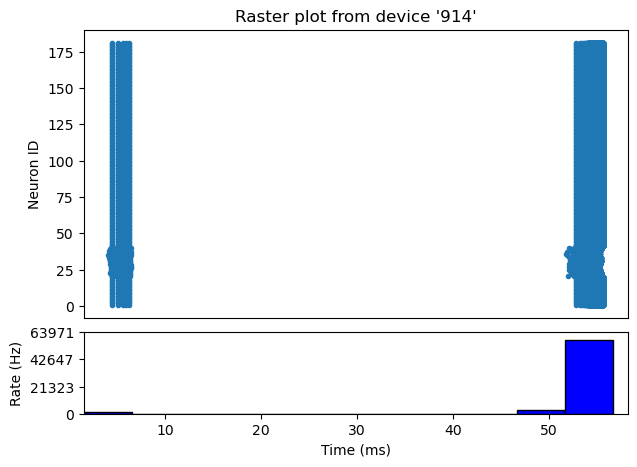

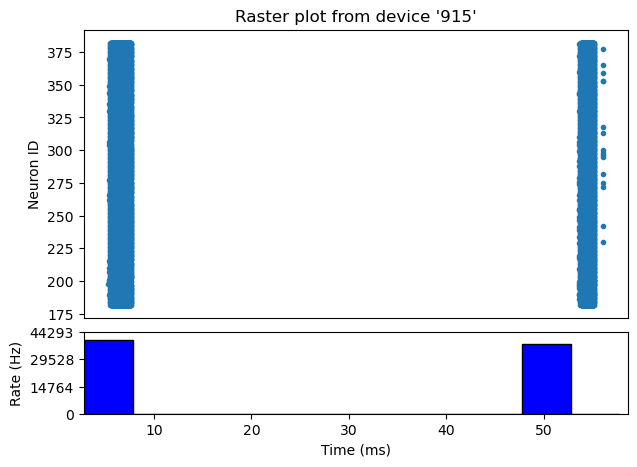

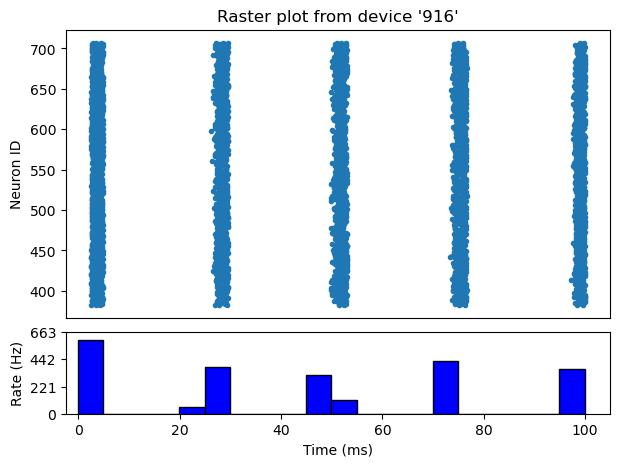

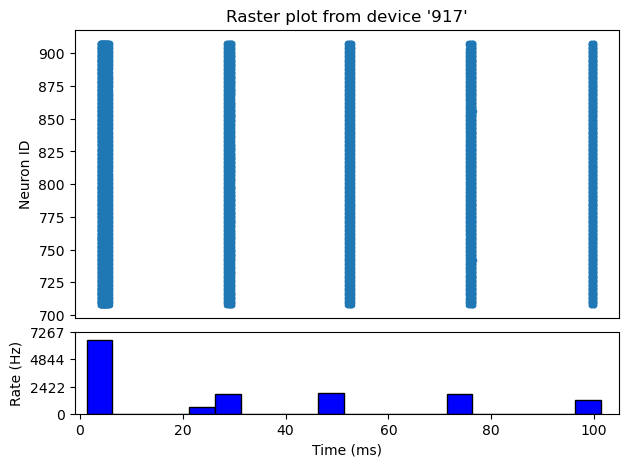

In [3]:
CorticalThalamicNetwork()

In [ ]:
#nest.GetDefaults('voltmeter')